# Time Series

By Vivian Zeng

U of Notre Dame

In [1]:
import pandas as pd

# Get the Data

In [2]:
%matplotlib inline

kaggle = pd.read_csv("kaggle.csv")
kaggle.head()

,Unnamed: 0,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,1,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,3,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,4,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,5,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [3]:
kaggle=kaggle.drop(kaggle.columns[0], axis=1)
kaggle.head()

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [4]:
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171230 entries, 0 to 171229
Data columns (total 11 columns):
BusinessDate                   171230 non-null object
BranchID                       171230 non-null int64
CashOrdersReceived             171230 non-null float64
CashBalance_StartOfDay         168463 non-null float64
TotalCashUsed                  171230 non-null float64
CashToVault                    171230 non-null float64
CashUnder                      171230 non-null float64
CashOver                       171230 non-null float64
TotalCashDisbursed             171230 non-null float64
TotalCashOpeningBalance        168463 non-null float64
TotalCashReceivedAllSources    171230 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.4+ MB


## Check missing values

In [5]:
kaggle.isnull().sum()

BusinessDate                      0
BranchID                          0
CashOrdersReceived                0
CashBalance_StartOfDay         2767
TotalCashUsed                     0
CashToVault                       0
CashUnder                         0
CashOver                          0
TotalCashDisbursed                0
TotalCashOpeningBalance        2767
TotalCashReceivedAllSources       0
dtype: int64

In [6]:
kaggle.isnull().sum().sum()

5534

In [7]:
# Convert date to a datetime object
kaggle.BusinessDate = pd.to_datetime(kaggle.BusinessDate)
kaggle.head()

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [8]:
kaggle[['BusinessDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171230 entries, 0 to 171229
Data columns (total 1 columns):
BusinessDate    171230 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.3 MB


the data type is now datetime64[ns] which is a datetime format based on the Numpy library that can handle up to nanosecond precision, this is the significance of the [ns]

In [9]:
# Extract the year
kaggle.BusinessDate.dt.year.unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010])

In [10]:
# Extract the month
kaggle.BusinessDate.dt.month.unique()

array([ 7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9,  8])

In [11]:
# Extract the day of the week
kaggle.BusinessDate.dt.dayofweek.unique()

array([4, 3, 2, 1, 0, 6, 5])

In [12]:
# Extract the name of the day of the week for the observation
kaggle.BusinessDate.dt.day_name().unique()

array(['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday',
       'Saturday'], dtype=object)

In [13]:
# Determine if beginning of month
kaggle.BusinessDate.dt.is_month_start.head()

0    False
1    False
2    False
3    False
4    False
Name: BusinessDate, dtype: bool

In [14]:
# Extract the month name for the observation
kaggle.BusinessDate.dt.month_name().head()

0    July
1    July
2    July
3    July
4    July
Name: BusinessDate, dtype: object

# EDA

In [15]:
# Set date to be index
kaggle.set_index('BusinessDate', inplace = True)
kaggle.index

DatetimeIndex(['2020-07-31', '2020-07-30', '2020-07-29', '2020-07-28',
               '2020-07-27', '2020-07-26', '2020-07-25', '2020-07-24',
               '2020-07-23', '2020-07-22',
               ...
               '2010-01-10', '2010-01-09', '2010-01-08', '2010-01-07',
               '2010-01-06', '2010-01-05', '2010-01-04', '2010-01-03',
               '2010-01-02', '2010-01-01'],
              dtype='datetime64[ns]', name='BusinessDate', length=171230, freq=None)

In [16]:
kaggle.head()

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


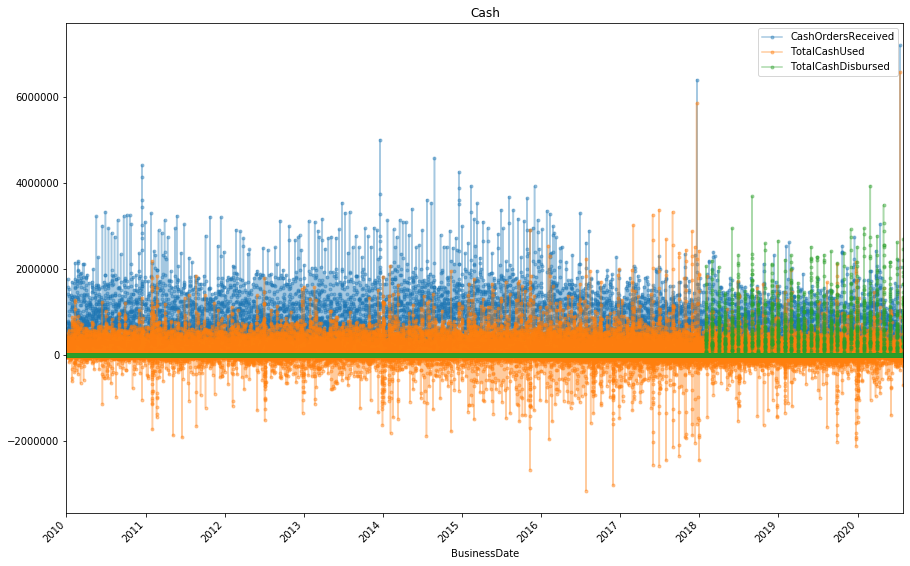

In [17]:
# Plot the some cash columns
%matplotlib inline
kaggle[['CashOrdersReceived', 
         'TotalCashUsed', 
         'TotalCashDisbursed']].plot(rot = 45, 
                                figsize = (15, 10), 
                                marker = ".", 
                                alpha = 0.4,
                                title = "Cash")

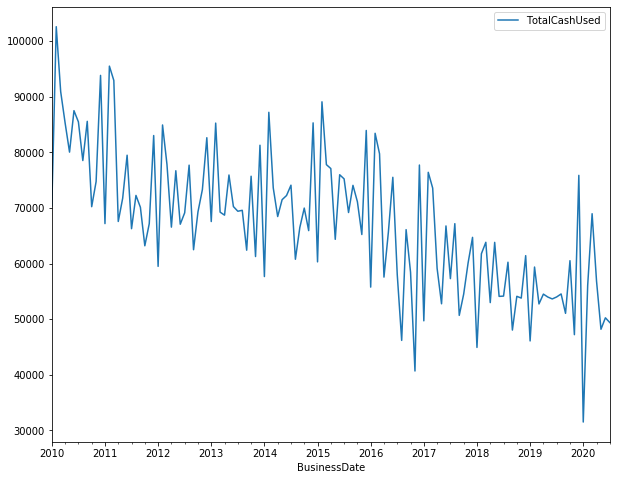

In [18]:
# Some verage monthly cash columns
kaggle.resample('M').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

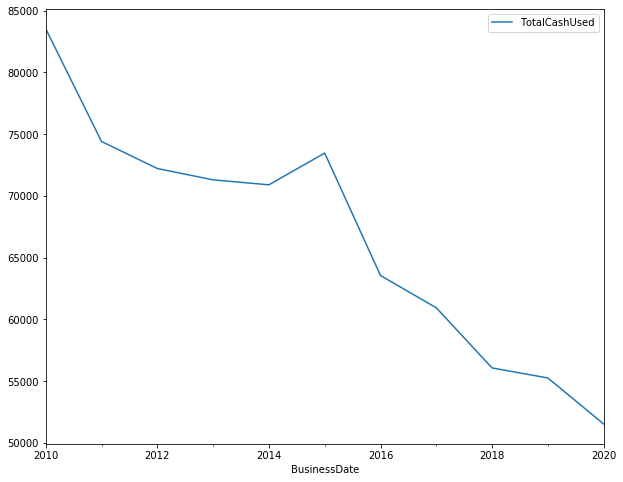

In [19]:
# Average CashOrdersReceived based on year
kaggle.resample('Y').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

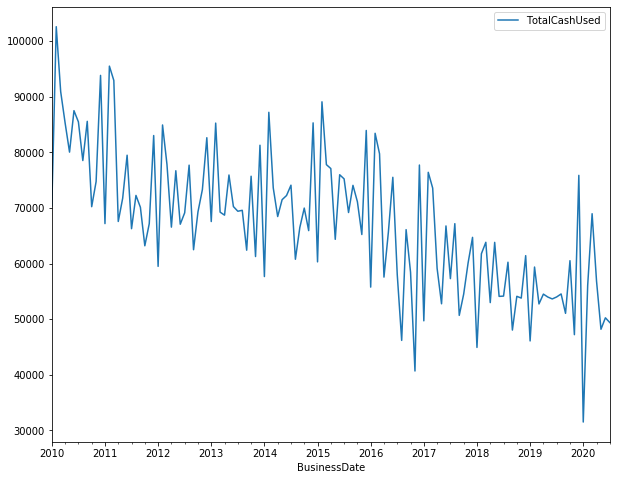

In [20]:
# Average CashOrdersReceived based on month
kaggle.resample('M').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

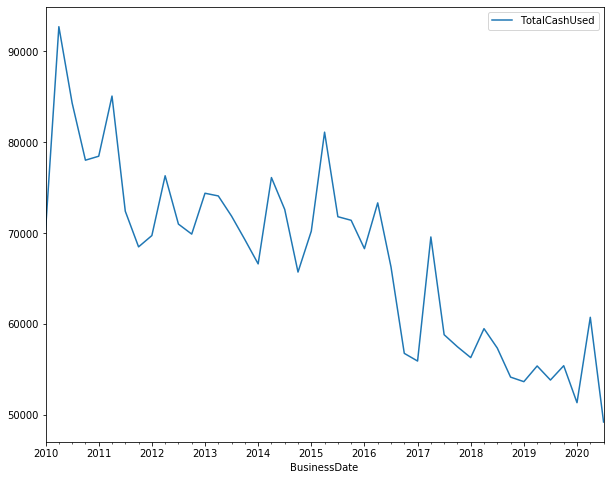

In [21]:
# Average CashOrdersReceived based on quarter
kaggle.resample('3M').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

# Predict for all BranchID

In [24]:
kaggle.head()

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [25]:
# Extract data from '2010-01-01' to '2020-07-31' as train
train=kaggle.loc['2010-01-01':'2020-07-31']

In [26]:
train.head()

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [27]:
# Reset the index to bring date in as column
train.reset_index(inplace = True)
train.head()

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [28]:
train.head()

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [29]:
print (train.BusinessDate.min())
print (train.BusinessDate.max())

2010-01-01 00:00:00
2020-07-31 00:00:00


In [30]:
# Extract only the variables of interest
train = train[['BusinessDate', 'BranchID','TotalCashUsed']]
train.head()

,BusinessDate,BranchID,TotalCashUsed
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [31]:
# Rename the columns as necessary
train.rename({'BusinessDate': 'ds', 'TotalCashUsed':'y'}, 
             axis = 'columns',
             inplace = True)
train.head()

,ds,BranchID,y
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [32]:
#pip install plotly

In [42]:
# Import Prophet
from fbprophet import Prophet
import plotly

# Create a new Prophet object
model = Prophet(yearly_seasonality=True, daily_seasonality=True)
print(model)

# Fit the model to the historical data
model.fit(train)

In [43]:
# Create DataFrame with future dates to predict at (08-01-2020 to 11-30-2020, 122 days in total)
future = model.make_future_dataframe(periods=122)
future.tail()

,ds
171347,2020-11-26
171348,2020-11-27
171349,2020-11-28
171350,2020-11-29
171351,2020-11-30


In [44]:
# Make predictions for next 122 days
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,80429.425066,-106982.210772,238066.366579,80429.425066,80429.425066,-23451.938032,-23451.938032,-23451.938032,7198.062302,...,-21527.53796,-21527.53796,-21527.53796,-9122.462374,-9122.462374,-9122.462374,0.0,0.0,0.0,56977.487034
1,2010-01-01,80429.425066,-101585.617755,244358.545444,80429.425066,80429.425066,-23451.938032,-23451.938032,-23451.938032,7198.062302,...,-21527.53796,-21527.53796,-21527.53796,-9122.462374,-9122.462374,-9122.462374,0.0,0.0,0.0,56977.487034
2,2010-01-01,80429.425066,-109765.579365,226900.390168,80429.425066,80429.425066,-23451.938032,-23451.938032,-23451.938032,7198.062302,...,-21527.53796,-21527.53796,-21527.53796,-9122.462374,-9122.462374,-9122.462374,0.0,0.0,0.0,56977.487034
3,2010-01-01,80429.425066,-108262.056915,210502.073655,80429.425066,80429.425066,-23451.938032,-23451.938032,-23451.938032,7198.062302,...,-21527.53796,-21527.53796,-21527.53796,-9122.462374,-9122.462374,-9122.462374,0.0,0.0,0.0,56977.487034
4,2010-01-01,80429.425066,-116634.653186,233167.168960,80429.425066,80429.425066,-23451.938032,-23451.938032,-23451.938032,7198.062302,...,-21527.53796,-21527.53796,-21527.53796,-9122.462374,-9122.462374,-9122.462374,0.0,0.0,0.0,56977.487034


ds - the timestamps

yhat - the predictions

yhat_lower - the lower bound of the prediction interval

yhat_upper - the upper bound of the prediction interval

In [45]:
# Extract the desired components
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
171347,2020-11-26,170211.516221,-6941.292354,356646.863202
171348,2020-11-27,24285.535279,-135495.761772,181217.575167
171349,2020-11-28,-19276.016324,-188651.854607,157298.449448
171350,2020-11-29,14727.809900,-145688.012430,192810.674630
171351,2020-11-30,23252.644172,-132007.929259,198582.858671


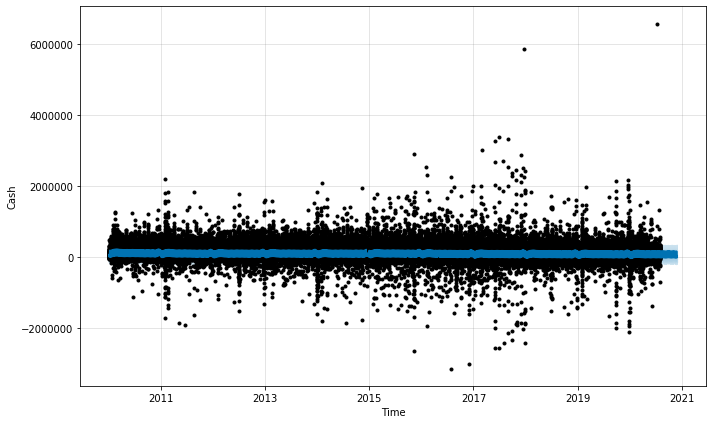

In [46]:
# Plot the model fit and predictions
forecast_plot = model.plot(forecast, 
                           xlabel = 'Time', 
                           ylabel = 'Cash')

In [47]:
forecast['weekday_name'] = forecast['ds'].dt.day_name()
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,weekday_name
0,2010-01-01,80429.425066,-106982.210772,238066.366579,80429.425066,80429.425066,-23451.938032,-23451.938032,-23451.938032,7198.062302,...,-21527.53796,-21527.53796,-9122.462374,-9122.462374,-9122.462374,0.0,0.0,0.0,56977.487034,Friday
1,2010-01-01,80429.425066,-101585.617755,244358.545444,80429.425066,80429.425066,-23451.938032,-23451.938032,-23451.938032,7198.062302,...,-21527.53796,-21527.53796,-9122.462374,-9122.462374,-9122.462374,0.0,0.0,0.0,56977.487034,Friday
2,2010-01-01,80429.425066,-109765.579365,226900.390168,80429.425066,80429.425066,-23451.938032,-23451.938032,-23451.938032,7198.062302,...,-21527.53796,-21527.53796,-9122.462374,-9122.462374,-9122.462374,0.0,0.0,0.0,56977.487034,Friday
3,2010-01-01,80429.425066,-108262.056915,210502.073655,80429.425066,80429.425066,-23451.938032,-23451.938032,-23451.938032,7198.062302,...,-21527.53796,-21527.53796,-9122.462374,-9122.462374,-9122.462374,0.0,0.0,0.0,56977.487034,Friday
4,2010-01-01,80429.425066,-116634.653186,233167.168960,80429.425066,80429.425066,-23451.938032,-23451.938032,-23451.938032,7198.062302,...,-21527.53796,-21527.53796,-9122.462374,-9122.462374,-9122.462374,0.0,0.0,0.0,56977.487034,Friday


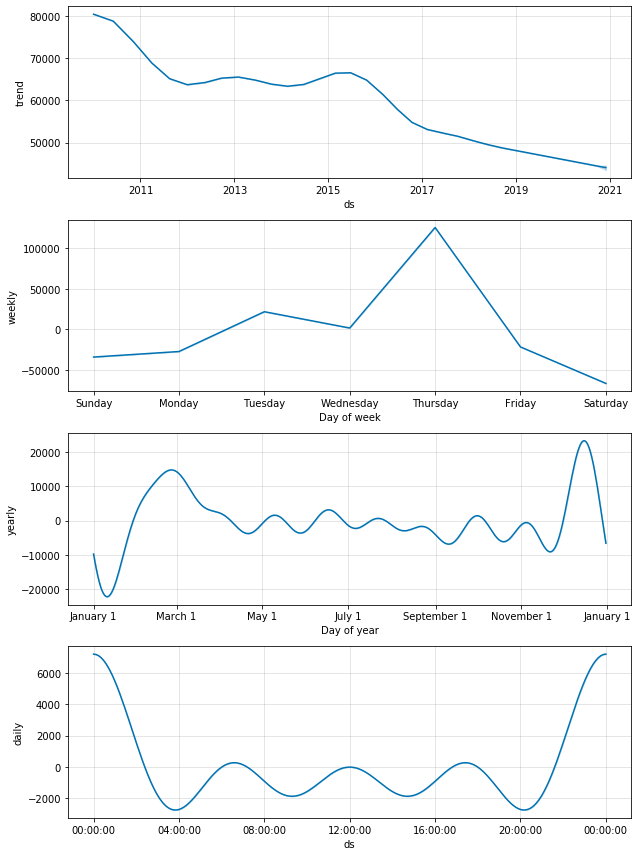

In [48]:
# Decompose the time-series into Seasonal and Non-Seasonal components
components_plot = model.plot_components(forecast)

## Set train based on Covid time frame

In [52]:
# Extract data from '2020-01-01' to '2020-07-31' as train
train_covid=kaggle.loc['2020-01-01':'2020-07-31']

In [53]:
# Reset the index to bring date in as column
train_covid.reset_index(inplace = True)
train_covid.head()

,BusinessDate,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
0,2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
1,2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2,2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
3,2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
4,2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


In [54]:
print (train_covid.BusinessDate.min())
print (train_covid.BusinessDate.max())

2020-01-01 00:00:00
2020-07-31 00:00:00


In [55]:
# Extract only the variables of interest
train_covid = train_covid[['BusinessDate', 'BranchID','TotalCashUsed']]
train_covid.head()
# Rename the columns as necessary
train_covid.rename({'BusinessDate': 'ds', 'TotalCashUsed':'y'}, 
             axis = 'columns',
             inplace = True)
train_covid.head()

,ds,BranchID,y
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [56]:
print (train_covid.ds.min())
print (train_covid.ds.max())

2020-01-01 00:00:00
2020-07-31 00:00:00


In [57]:
#from fbprophet import Prophet
#import plotly

# Create a new Prophet object
model_covid = Prophet(yearly_seasonality=True, daily_seasonality=True)
print(model_covid)

# Fit the model to the historical data
model_covid.fit(train_covid)

In [58]:
future_covid = model_covid.make_future_dataframe(periods=122)
future_covid.tail()

,ds
10554,2020-11-26
10555,2020-11-27
10556,2020-11-28
10557,2020-11-29
10558,2020-11-30


In [59]:
# Make predictions for next 122 days
forecast_covid = model_covid.predict(future_covid)
forecast_covid.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,-85743.798236,-304980.037274,28586.184665,-85743.798236,-85743.798236,-55327.25715,-55327.25715,-55327.25715,-913569.211425,...,-13385.432384,-13385.432384,-13385.432384,871627.386659,871627.386659,871627.386659,0.0,0.0,0.0,-141071.055386
1,2020-01-01,-85743.798236,-290458.125722,13155.117490,-85743.798236,-85743.798236,-55327.25715,-55327.25715,-55327.25715,-913569.211425,...,-13385.432384,-13385.432384,-13385.432384,871627.386659,871627.386659,871627.386659,0.0,0.0,0.0,-141071.055386
2,2020-01-01,-85743.798236,-302886.153368,12330.616005,-85743.798236,-85743.798236,-55327.25715,-55327.25715,-55327.25715,-913569.211425,...,-13385.432384,-13385.432384,-13385.432384,871627.386659,871627.386659,871627.386659,0.0,0.0,0.0,-141071.055386
3,2020-01-01,-85743.798236,-307207.352425,22968.180701,-85743.798236,-85743.798236,-55327.25715,-55327.25715,-55327.25715,-913569.211425,...,-13385.432384,-13385.432384,-13385.432384,871627.386659,871627.386659,871627.386659,0.0,0.0,0.0,-141071.055386
4,2020-01-01,-85743.798236,-306359.030234,28506.348293,-85743.798236,-85743.798236,-55327.25715,-55327.25715,-55327.25715,-913569.211425,...,-13385.432384,-13385.432384,-13385.432384,871627.386659,871627.386659,871627.386659,0.0,0.0,0.0,-141071.055386


In [60]:
print (forecast_covid.ds.min())
print (forecast_covid.ds.max())

2020-01-01 00:00:00
2020-11-30 00:00:00


In [61]:
# Extract the desired components
forecast_covid[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10554,2020-11-26,-9.103362e+06,-9.448907e+06,-8.790894e+06
10555,2020-11-27,-9.307992e+06,-9.669560e+06,-8.980715e+06
10556,2020-11-28,-9.367600e+06,-9.719176e+06,-9.035479e+06
10557,2020-11-29,-9.274682e+06,-9.636177e+06,-8.932686e+06
10558,2020-11-30,-9.156789e+06,-9.538224e+06,-8.809700e+06


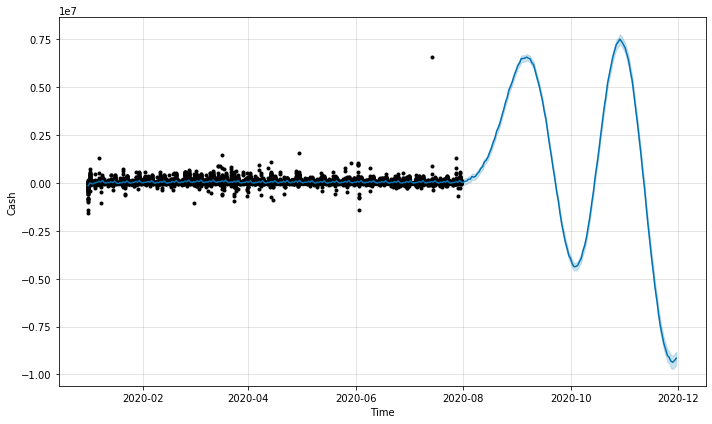

In [62]:
# Plot the model fit and predictions
forecast_covid_plot = model_covid.plot(forecast_covid, 
                                       xlabel = 'Time', 
                                       ylabel = 'Cash')

## Compare the predicts based on train and train_covid

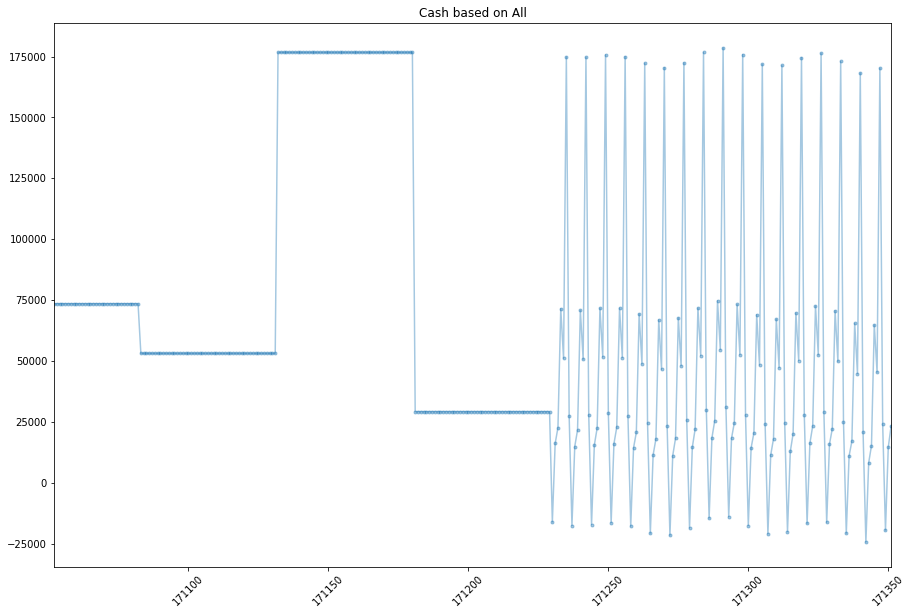

In [65]:
# Plot the some cash columns
%matplotlib inline
forecast.tail(300).yhat.plot(rot = 45, 
                                figsize = (15, 10), 
                                marker = ".", 
                                alpha = 0.4,
                                title = "Cash based on All")

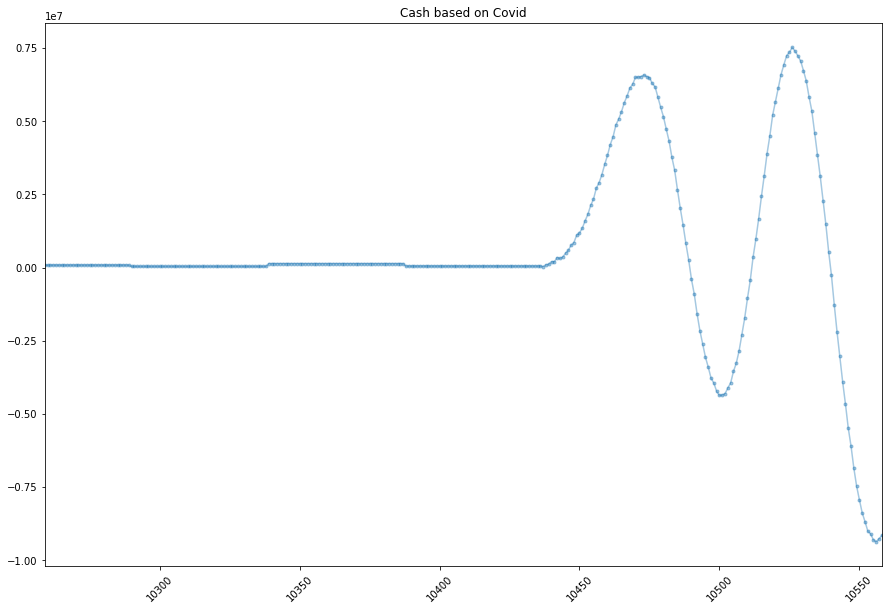

In [66]:
# Plot the some cash columns
%matplotlib inline
forecast_covid.tail(300).yhat.plot(rot = 45, 
                                figsize = (15, 10), 
                                marker = ".", 
                                alpha = 0.4,
                                title = "Cash based on Covid")

# Dig into EDA for data during covid time frame

In [71]:
covid=kaggle.loc['2020-01-01':'2020-07-31']

In [72]:
#kaggle.head()

In [73]:
covid.head()

,BranchID,CashOrdersReceived,CashBalance_StartOfDay,TotalCashUsed,CashToVault,CashUnder,CashOver,TotalCashDisbursed,TotalCashOpeningBalance,TotalCashReceivedAllSources
BusinessDate,,,,,,,,,,
2020-07-31,99,0.00,775054.00,-43718.13,0.0,0.0,0.0,1196392.62,1095684.09,875762.53
2020-07-30,99,0.00,1036464.13,261410.14,0.0,0.0,0.0,0.00,1036464.13,0.00
2020-07-29,99,400540.11,1141386.84,104922.70,0.0,0.0,0.0,0.00,1141386.84,0.00
2020-07-28,99,0.00,864871.20,124024.48,0.0,0.0,0.0,0.00,864871.20,0.00
2020-07-27,99,0.00,923948.57,59077.37,0.0,0.0,0.0,0.00,923948.57,0.00


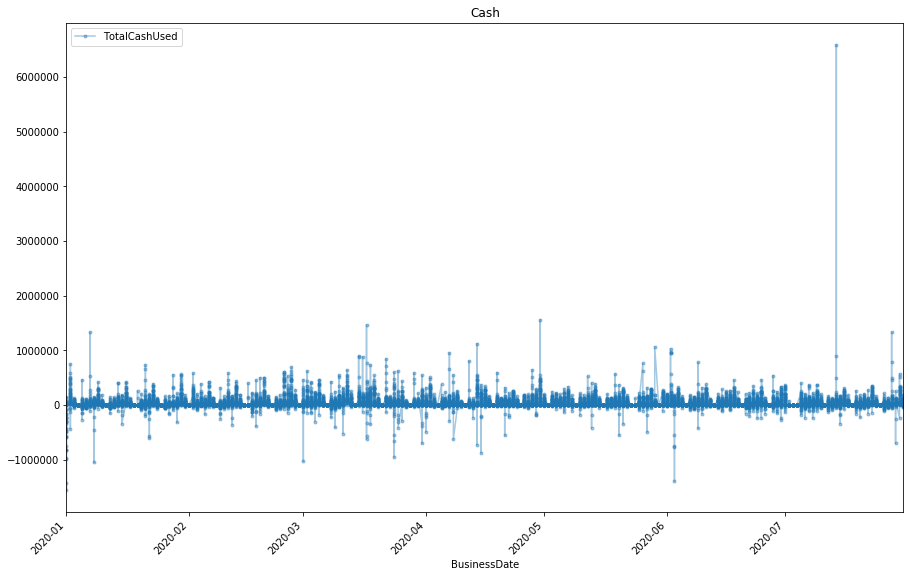

In [74]:
# Plot the some cash columns
%matplotlib inline
covid[['TotalCashUsed']].plot(rot = 45, 
                                figsize = (15, 10), 
                                marker = ".", 
                                alpha = 0.4,
                                title = "Cash")

In [81]:
# Some average monthly cash columns
#covid.resample('M').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [82]:
# Some average weekly cash columns
#covid.resample('W').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [83]:
# Some average 3d cash columns
#covid.resample('3d').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

# EDA for mixed pure covid and nomal train data

In [84]:
normal_covid=kaggle.loc['2019-01-01':'2020-07-31']

In [86]:
# Some average 3d cash columns
#normal_covid.resample('3d').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

In [87]:
# Some average week cash columns
#normal_covid.resample('w').agg({'TotalCashUsed':'mean'}).plot(figsize = (10,8))

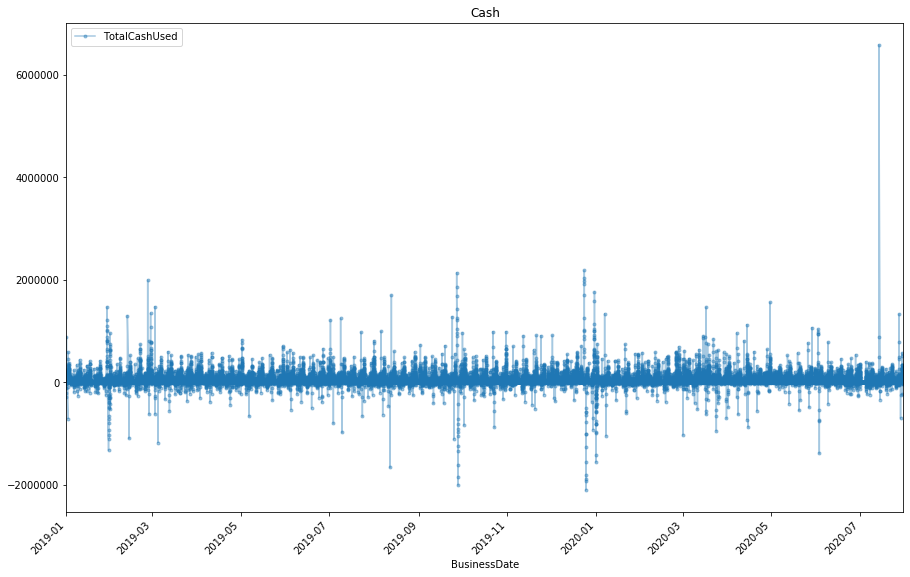

In [88]:
# Plot the some cash columns
%matplotlib inline
normal_covid[['TotalCashUsed']].plot(rot = 45, 
                                figsize = (15, 10), 
                                marker = ".", 
                                alpha = 0.4,
                                title = "Cash")

# Predict based on mixed train based on normal and covid train

In [89]:
# Reset the index to bring date in as column
normal_covid.reset_index(inplace = True)
normal_covid.head()
# Extract only the variables of interest
normal_covid_train = normal_covid[['BusinessDate', 'BranchID','TotalCashUsed']]
normal_covid_train.head()

,BusinessDate,BranchID,TotalCashUsed
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [90]:
# Rename the columns as necessary
normal_covid_train.rename({'BusinessDate': 'ds', 'TotalCashUsed':'y'}, 
             axis = 'columns',
             inplace = True)
normal_covid_train.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,ds,BranchID,y
0,2020-07-31,99,-43718.13
1,2020-07-30,99,261410.14
2,2020-07-29,99,104922.70
3,2020-07-28,99,124024.48
4,2020-07-27,99,59077.37


In [91]:
# Create a new Prophet object
model_nc = Prophet(yearly_seasonality=True, daily_seasonality=True)
print(model)

# Fit the model to the historical data
model_nc.fit(normal_covid_train)

In [92]:
# Create DataFrame with future dates to predict at (08-01-2020 to 11-30-2020, 122 days in total)
future_nc = model_nc.make_future_dataframe(periods=122)
future_nc.tail()

,ds
28369,2020-11-26
28370,2020-11-27
28371,2020-11-28
28372,2020-11-29
28373,2020-11-30


In [93]:
# Make predictions for next 122 days
forecast_nc = model_nc.predict(future_nc)
forecast_nc.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,12405.063932,-76807.479054,258396.345868,12405.063932,12405.063932,77674.262536,77674.262536,77674.262536,49732.375675,...,40712.176247,40712.176247,40712.176247,-12770.289385,-12770.289385,-12770.289385,0.0,0.0,0.0,90079.326468
1,2019-01-01,12405.063932,-63866.248949,250455.074767,12405.063932,12405.063932,77674.262536,77674.262536,77674.262536,49732.375675,...,40712.176247,40712.176247,40712.176247,-12770.289385,-12770.289385,-12770.289385,0.0,0.0,0.0,90079.326468
2,2019-01-01,12405.063932,-65565.233711,257648.178109,12405.063932,12405.063932,77674.262536,77674.262536,77674.262536,49732.375675,...,40712.176247,40712.176247,40712.176247,-12770.289385,-12770.289385,-12770.289385,0.0,0.0,0.0,90079.326468
3,2019-01-01,12405.063932,-75086.080949,253864.765966,12405.063932,12405.063932,77674.262536,77674.262536,77674.262536,49732.375675,...,40712.176247,40712.176247,40712.176247,-12770.289385,-12770.289385,-12770.289385,0.0,0.0,0.0,90079.326468
4,2019-01-01,12405.063932,-67091.414747,250047.793457,12405.063932,12405.063932,77674.262536,77674.262536,77674.262536,49732.375675,...,40712.176247,40712.176247,40712.176247,-12770.289385,-12770.289385,-12770.289385,0.0,0.0,0.0,90079.326468


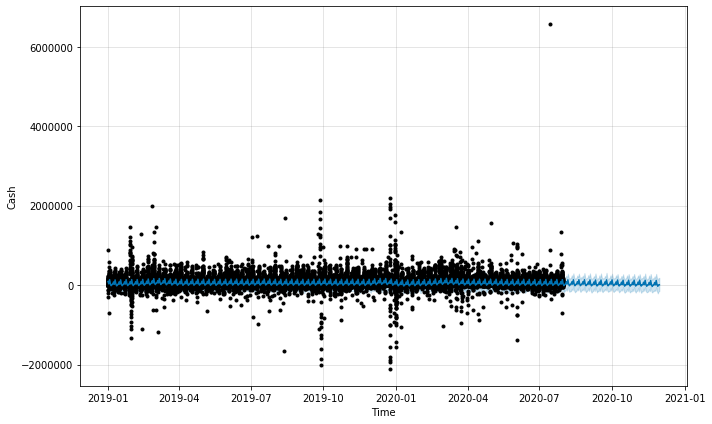

In [94]:
# Plot the model fit and predictions
forecast_plot = model_nc.plot(forecast_nc, 
                           xlabel = 'Time', 
                           ylabel = 'Cash')

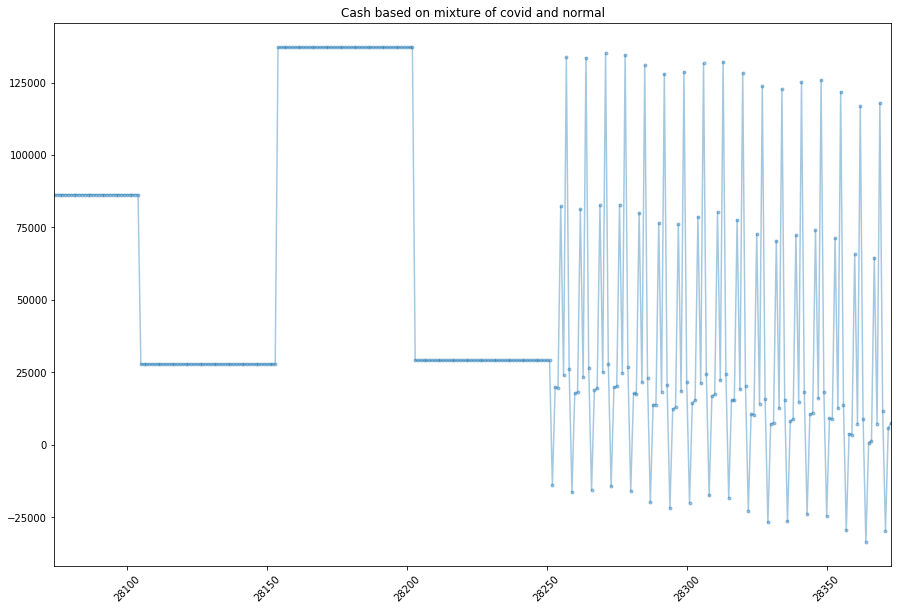

In [95]:
# Plot the some cash columns
%matplotlib inline
forecast_nc.tail(300).yhat.plot(rot = 45, 
                                figsize = (15, 10), 
                                marker = ".", 
                                alpha = 0.4,
                                title = "Cash based on mixture of covid and normal")

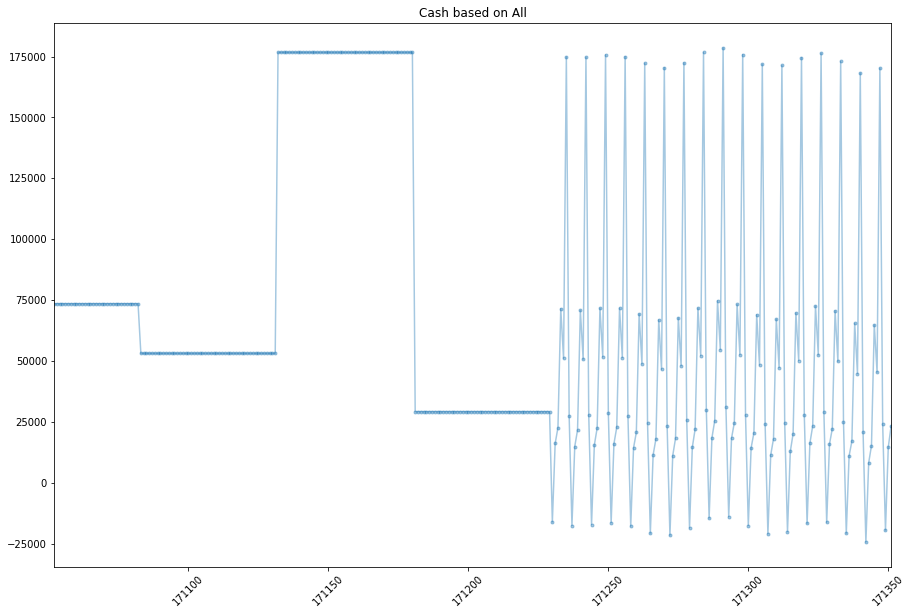

In [96]:
# Plot the some cash columns
%matplotlib inline
forecast.tail(300).yhat.plot(rot = 45, 
                                figsize = (15, 10), 
                                marker = ".", 
                                alpha = 0.4,
                                title = "Cash based on All")

In [106]:
forecast.yhat.describe()

count    171352.000000
mean      66463.103638
std       58552.837960
min      -35407.374028
25%       29864.594794
50%       50556.630928
75%       83917.960975
max      228477.037881
Name: yhat, dtype: float64

In [107]:
forecast_nc.yhat.describe()

count     28374.000000
mean      53792.656813
std       47131.128797
min      -33485.213422
25%       27960.333538
50%       35832.152155
75%       90206.851981
max      170438.354298
Name: yhat, dtype: float64